In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from golab import *

# Load data

In [2]:
filepath = "example-data.xlsx"
sheet = "baselined"

# GABA CRC for all constructs and cells
header_rows = [0,1,2,3]
data_rows = list(range(4,14))
gaba_crc = pd.read_excel(filepath, sheet_name=sheet, index_col=0, header=header_rows, skiprows=lambda row: row not in header_rows + data_rows, parse_dates=True, date_format='%Y-%m-%d')
remove_outliers(gaba_crc)

# GABA + PPF max for all constructs and cells
header_rows = [0,1,2]
data_rows = [14]
gaba_ppf_max = pd.read_excel(filepath, sheet_name=sheet, index_col=0, header=header_rows, skiprows=lambda row: row not in header_rows + data_rows, parse_dates=True, date_format='%Y-%m-%d')
remove_outliers(gaba_ppf_max)

# PTX for all constructs and cells
header_rows = [0,1,2]
data_rows = [15]
ptx = pd.read_excel(filepath, sheet_name=sheet, index_col=0, header=header_rows, skiprows=lambda row: row not in header_rows + data_rows, parse_dates=True, date_format='%Y-%m-%d')
remove_outliers(ptx)

# GABA CRC Hill fit for all constructs and cells
header_rows = [0,1,2]
data_rows = [18, 19, 20]
gaba_crc_hill_fit = pd.read_excel(filepath, sheet_name=sheet, index_col=0, header=header_rows, skiprows=lambda row: row not in header_rows + data_rows, parse_dates=True, date_format='%Y-%m-%d')
remove_outliers(gaba_crc_hill_fit)

In [3]:
gaba_crc

Construct   α1(L9'T)β2γ2                                    
Date          2023-09-05                          2024-01-17
Cell                   1           2          2'           1
[GABA] (μM)  I_GABA (μA) I_GABA (μA) I_GABA (μA) I_GABA (μA)
0.01                 2.6         7.7        10.7         0.0
0.10                15.9        36.5        50.7        50.0
0.30                37.2        54.9        76.3        80.4
1.00                60.7        66.2        91.9        86.8
3.00                80.5         NaN        99.5        87.0
10.00               95.3        72.0       100.0        94.1
30.00              100.0        88.9         NaN        88.1
100.00               NaN       100.0         NaN       100.0
300.00               NaN         NaN         NaN        99.3
1000.00              NaN         NaN         NaN         NaN

In [4]:
gaba_ppf_max

Construct           α1(L9'T)β2γ2                         
Date                  2023-09-05               2024-01-17
Cell                           1   2        2'          1
I_GABA+PPF max (μA)          NaN NaN  0.027306   0.278718

In [5]:
ptx

Construct  α1(L9'T)β2γ2                              
Date         2023-09-05                    2024-01-17
Cell                  1        2        2'          1
I_PTX (μA)     0.810953  0.23397  0.096612   0.547068

In [6]:
gaba_crc_hill_fit

Construct  α1(L9'T)β2γ2                               
Date         2023-09-05                     2024-01-17
Cell                  1         2        2'          1
Ymax (μA)      0.860068  0.715150  0.139045   0.762476
EC50 (μM)      0.299887  0.035893  0.559791   0.498818
Hill slope     0.614766  0.791449  0.720301   0.962409

# Examples of accessing parts of the data

In [7]:
gaba_crc.loc[:,"α1(L9'T)β2γ2"]

Date         2023-09-05                          2024-01-17
Cell                  1           2          2'           1
[GABA] (μM) I_GABA (μA) I_GABA (μA) I_GABA (μA) I_GABA (μA)
0.01                2.6         7.7        10.7         0.0
0.10               15.9        36.5        50.7        50.0
0.30               37.2        54.9        76.3        80.4
1.00               60.7        66.2        91.9        86.8
3.00               80.5         NaN        99.5        87.0
10.00              95.3        72.0       100.0        94.1
30.00             100.0        88.9         NaN        88.1
100.00              NaN       100.0         NaN       100.0
300.00              NaN         NaN         NaN        99.3
1000.00             NaN         NaN         NaN         NaN

In [8]:
gaba_crc.loc[:,("α1(L9'T)β2γ2", "2023-09-05")]

Cell,1,2,2'
[GABA] (μM),I_GABA (μA),I_GABA (μA),I_GABA (μA)
0.01,2.6,7.7,10.7
0.10,15.9,36.5,50.7
0.30,37.2,54.9,76.3
1.00,60.7,66.2,91.9
3.00,80.5,NaN,99.5
10.00,95.3,72.0,100.0
30.00,100.0,88.9,NaN
100.00,NaN,100.0,NaN
300.00,NaN,NaN,NaN


In [9]:
gaba_crc.loc[:,("α1(L9'T)β2γ2", "2023-09-05", 2)]

[GABA] (μM),I_GABA (μA)
0.01,7.7
0.10,36.5
0.30,54.9
1.00,66.2
3.00,NaN
10.00,72.0
30.00,88.9
100.00,100.0
300.00,NaN
1000.00,NaN


# Example plot

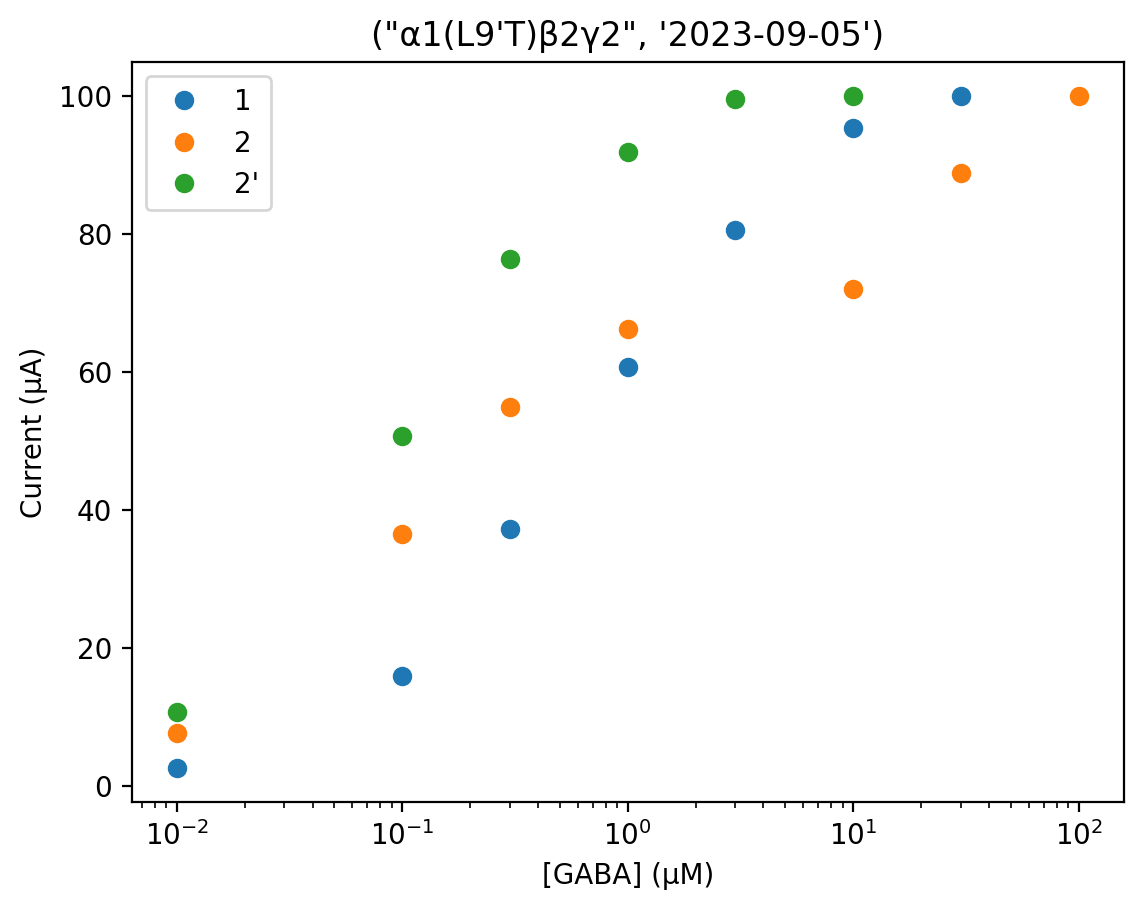

In [10]:
x = gaba_crc.index.values
y = gaba_crc.loc[:,("α1(L9'T)β2γ2", "2023-09-05")].values
labels = gaba_crc.loc[:,("α1(L9'T)β2γ2", "2023-09-05")].columns.levels[0].values
plt.plot(x, y, 'o')
plt.xscale('log')
plt.xlabel('[GABA] (μM)')
plt.ylabel('Current (μA)')
plt.title(("α1(L9'T)β2γ2", "2023-09-05"))
plt.legend(labels);